The interpersonal theory of suicide has made significant contributions to scientific and clinical understanding of suicide and related illnesses over the last decade. Suicidal desire originates when individuals suffer persistent sentiments of perceived burdensomeness and thwarted belongingness, according to the interpersonal theory of suicide, and near-fatal or lethal suicidal action occurs in the context of suicidal want and competence for suicide. A rising number of research have examined these proposed pathways in a variety of samples, but the results have yet to be meta-analyzed. here is the Exploratory analysis of the Suicides attempted by people in consecutive three years i.e from 2009 to 2011. Dataset link: https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/SuicideChina.csv

<h1><b>General Information about the dataset</b></h1>

In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.express as px           # contains functions that can create entire figures at once
import plotly.graph_objects as go  
%matplotlib inline

In [17]:
Suicide = pd.read_csv('SuicideChina.csv')

In [18]:
Suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sno           2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [19]:
 Suicide.head()

,Sno,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [21]:
Suicide.shape

(2571, 12)

In [22]:
Suicide.size

30852

In [23]:
Suicide.dtypes

Sno              int64
Person_ID        int64
Hospitalised    object
Died            object
Urban           object
Year             int64
Month            int64
Sex             object
Age              int64
Education       object
Occupation      object
method          object
dtype: object

In [24]:
Suicide.describe()

,Sno,Person_ID,Year,Month,Age
count,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000
mean,1286.000000,1286.000000,2010.045508,6.298327,52.630883
std,742.328095,742.328095,0.791412,3.202515,19.783878
min,1.000000,1.000000,2009.000000,1.000000,12.000000
25%,643.500000,643.500000,2009.000000,4.000000,37.000000
50%,1286.000000,1286.000000,2010.000000,6.000000,53.000000
75%,1928.500000,1928.500000,2011.000000,9.000000,69.000000
max,2571.000000,2571.000000,2011.000000,12.000000,100.000000


In [25]:
Suicide.corr()

,Sno,Person_ID,Year,Month,Age
Sno,1.000000,1.000000,0.014625,-0.017492,-0.040988
Person_ID,1.000000,1.000000,0.014625,-0.017492,-0.040988
Year,0.014625,0.014625,1.000000,0.009380,-0.017267
Month,-0.017492,-0.017492,0.009380,1.000000,-0.028397
Age,-0.040988,-0.040988,-0.017267,-0.028397,1.000000


<h1><b>Data Cleaning</b></h1>

In [72]:
# generate preview of entries with null values
if Suicide.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(Suicide[Suicide.isnull().any(axis=1)].head(3))
    missingno.matrix(Suicide)

<AxesSubplot:>

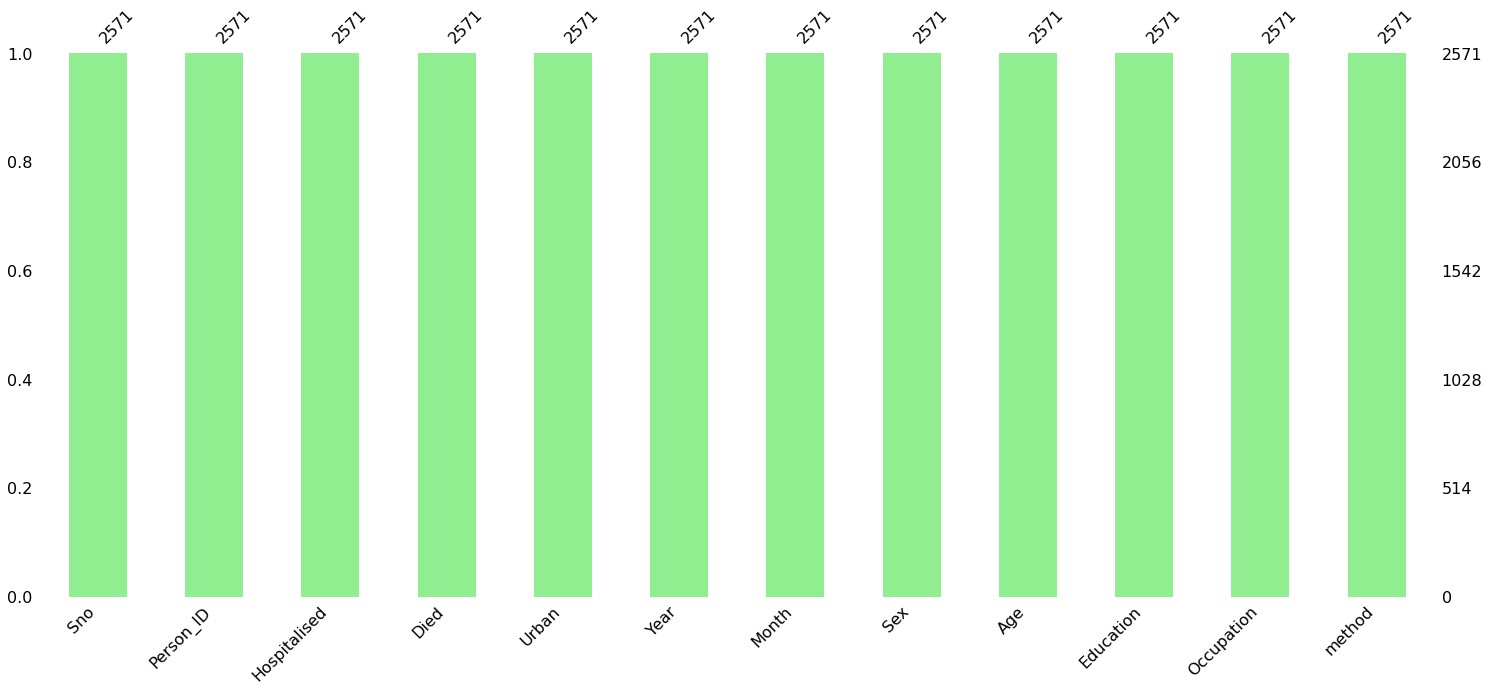

In [73]:
import missingno as no
no.bar(Suicide, color='lightgreen')

In [31]:
# Drop rows contains missing values
Suicide.dropna(axis=0, inplace=True)
Suicide.reset_index(drop=True, inplace=True)
Suicide

,Sno,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide
...,...,...,...,...,...,...,...,...,...,...,...,...
2566,2567,2567,yes,no,unknown,2010,7,male,28,primary,household,Pesticide
2567,2568,2568,yes,no,unknown,2011,6,male,35,Secondary,farming,Pesticide
2568,2569,2569,yes,no,unknown,2011,9,female,22,Secondary,unemployed,Other poison
2569,2570,2570,yes,no,unknown,2010,8,female,50,Secondary,farming,Pesticide


<h1><b>Data Visualization</b></h1>

<AxesSubplot:>

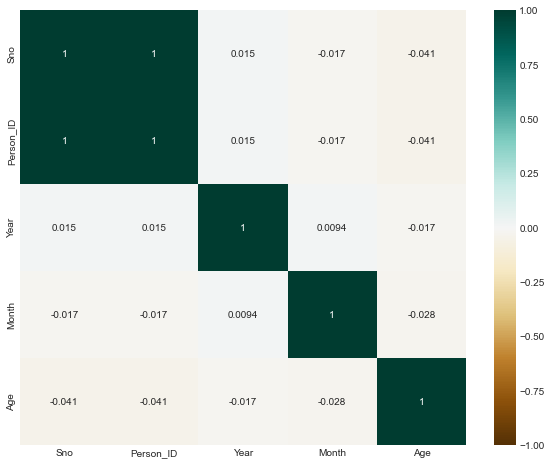

In [229]:
plt.figure(figsize=(10,8))
sns.heatmap(Suicide.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Based on the above data the data is not interdependent on each other.

C:\Users\srash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average age of Suicidal attempts')

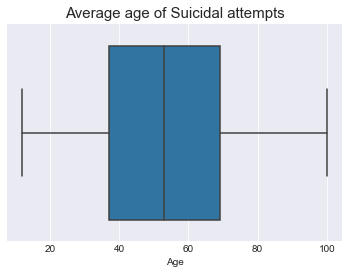

In [234]:
sns.boxplot(Suicide['Age'])
plt.title("Average age of Suicidal attempts", fontsize=15)

 Above boxplot shows the average age of suicidal attempts of people which is in between 

In [100]:
# Extract data for plotting distribution
Suicide_distribution = Suicide.iloc[:]
Suicide_distribution.head()

,Sno,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


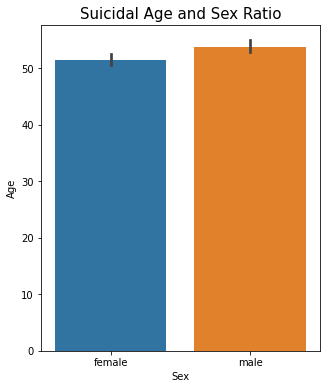

In [33]:
plt.figure(figsize=(5,6))
sns.barplot(x="Sex", y="Age",data=Suicide)
plt.title("Suicidal Age and Sex Ratio", fontsize=15)
plt.show()

Above figure represents the suicidal ratio between Males and Females. The sucides committed by males are slight on the higher side than those committed by females. Moreover, the average age group of the males and females is 55 and 51 respectively.

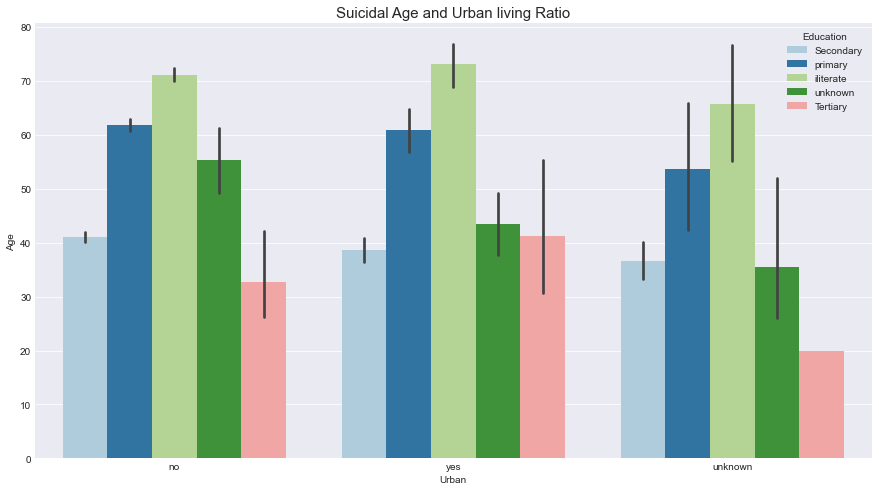

In [239]:
plt.figure(figsize=(15,8))
sns.barplot(x="Urban", y="Age",data=Suicide, hue='Education', palette='Paired')
plt.title("Suicidal Age and Urban living Ratio", fontsize=15)
plt.show()

The graph depicts the number of persons who attempted suicide while living in an urban region, categorize by their educational level and age.

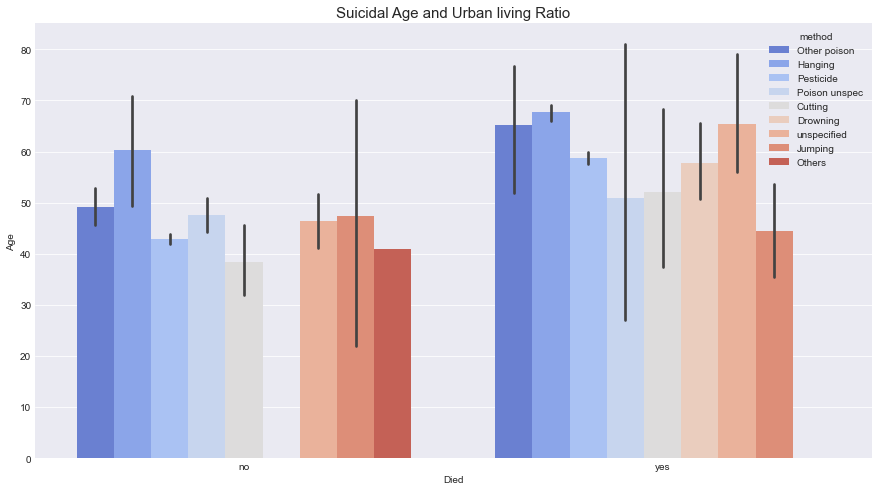

In [241]:
plt.figure(figsize=(15,8))
sns.barplot(x="Died", y="Age",data=Suicide, hue='method', palette='coolwarm')
plt.title("Suicidal Age and Urban living Ratio", fontsize=15)
plt.show()

The graph depicts the number of persons who died after attempting suicide, categorized by their occupation and age.

In [98]:
Suicide['Hospitalised'].value_counts()

yes    1553
no     1018
Name: Hospitalised, dtype: int64

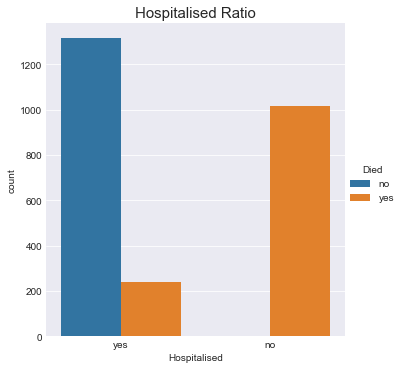

In [223]:
sns.catplot(x='Hospitalised', kind='count', data=Suicide, hue = 'Died')
plt.title("Hospitalised Ratio", fontsize=15)
plt.show()

Females are hospitalized in greater numbers than males, with over 800 compared to 650 for males. There are fewer persons who do not go to the hospital after attempting suicide, with women having a lower number than men.

In [42]:
df1=Suicide['Occupation'].value_counts()

In [43]:
df1

farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64

In [264]:
fig = px.pie(Suicide, names='Occupation', title='Occupation of people who committed suicide')
fig.show()

Farmers make up the majority of those who commit suicide, accounting for 79 percent of all suicides.

In [67]:
df2=Suicide['method'].value_counts()
df2

Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64

In [269]:
fig = px.pie(Suicide, values="Person_ID", names='method', title='Methods of Suicide', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [68]:
df3=Suicide['Education'].value_counts()
df3

Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64

In [305]:
fig = go.Figure(data=[go.Pie(labels=df3.index, values=df3.values, pull=[0,0,0,0.5,0.5])])
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

50 percent of people who committed suicide were educated till secondary level.

In [112]:
df7=Suicide['Year'].value_counts()

In [116]:
df7

2010    956
2011    866
2009    749
Name: Year, dtype: int64

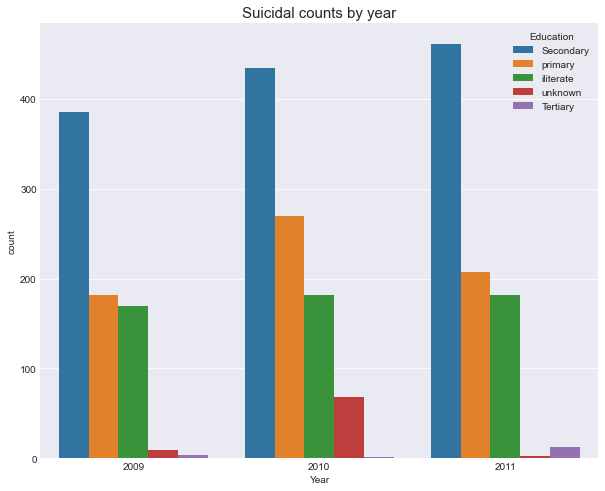

In [293]:
plt.figure(figsize=(10,8))
sns.countplot(x='Year', data=Suicide, hue = 'Education')
plt.title("Suicidal counts by year", fontsize=15)
plt.show()

In 2011, the highest number of suicides were committed by those with a secondary education, while the lowest number of suicides were committed by people in the iiterate group.

Text(0.5, 1.0, 'Suicidal counts by Month')

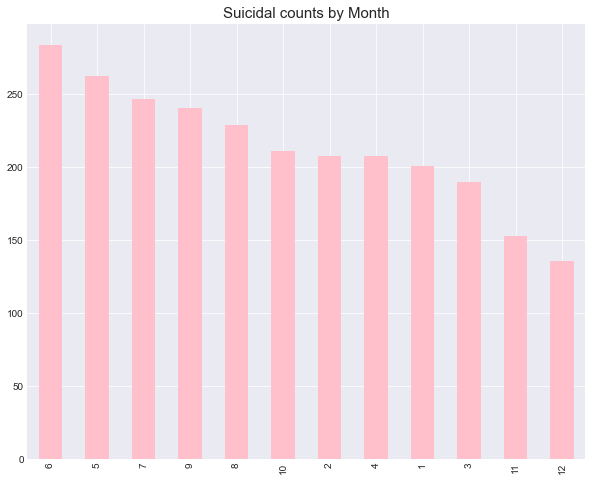

In [294]:
plt.figure(figsize=(10,8))
Suicide.Month.value_counts().plot(kind='bar',color='pink')
plt.title("Suicidal counts by Month", fontsize=15)

The month of June is the month in which the most of people commit suicide. The reason seems to be that farmers have a tough time generating money this month owing to natural disasters, and their anguish leads to suicide.

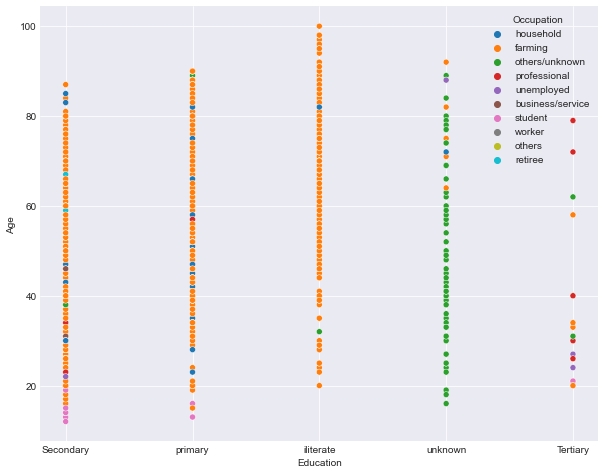

In [298]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=Suicide['Education'] , y=Suicide['Age'], hue=Suicide.Occupation )
plt.show()

The scatterplot illustrates the occupation of the people who committed suicide, categorized through their age and education level.